In [228]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email-classification/email.csv


In [229]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [230]:
df=pd.read_csv('/kaggle/input/spam-email-classification/email.csv')

In [231]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [232]:
df = df.iloc[:-1, :]


In [233]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [234]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [235]:
df.duplicated().sum()

415

In [236]:
df.drop_duplicates(inplace=True)

In [237]:
df.duplicated().sum()

0

In [238]:
df.dropna(inplace=True)

In [239]:
df.shape

(5157, 2)

In [240]:
X=df['Message']

In [241]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [242]:
y=df['Category']
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Category, dtype: object

In [243]:
df['Category'].replace({'spam': 1, 'ham': 0}, inplace=True)


In [244]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [245]:
#train test split 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import seaborn as sns
%matplotlib inline

In [246]:
cv=CountVectorizer()
#cv=TfidfVectorizer(ngram_range=(1,3),max_features=10)

In [247]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=34)


In [248]:
X_train.shape

(3867,)

In [249]:
X_train.head()

252     Wen ur lovable bcums angry wid u, dnt take it ...
4527    I want some cock! My hubby's away, I need a re...
4732                            K:)eng rocking in ashes:)
5316                         Jus finish watching tv... U?
3604    I'm not sure, I was just checking out what was...
Name: Message, dtype: object

In [250]:
X_trains_t=cv.fit_transform(X_train)
X_test_t=cv.transform(X_test)

In [251]:
print(X_trains_t)


  (0, 7068)	1
  (0, 6836)	1
  (0, 4042)	1
  (0, 1191)	1
  (0, 889)	2
  (0, 7113)	1
  (0, 2246)	1
  (0, 6360)	1
  (0, 3588)	1
  (0, 5738)	1
  (0, 1930)	1
  (0, 1228)	1
  (0, 3576)	1
  (0, 4388)	1
  (0, 1685)	1
  (0, 6702)	1
  (0, 7026)	1
  (0, 4667)	1
  (0, 5834)	1
  (0, 2089)	1
  (0, 774)	1
  (0, 1563)	1
  (0, 4080)	1
  (0, 3749)	1
  (0, 4151)	1
  :	:
  (3864, 782)	1
  (3864, 2323)	1
  (3864, 7293)	1
  (3864, 5945)	1
  (3864, 1771)	1
  (3864, 1083)	1
  (3864, 6588)	1
  (3864, 5956)	1
  (3864, 4396)	1
  (3864, 5918)	1
  (3865, 4609)	1
  (3865, 7010)	1
  (3865, 705)	1
  (3865, 7286)	1
  (3865, 1683)	1
  (3866, 3106)	1
  (3866, 3727)	1
  (3866, 5342)	1
  (3866, 4480)	1
  (3866, 3128)	1
  (3866, 1149)	1
  (3866, 3377)	1
  (3866, 7299)	1
  (3866, 4876)	1
  (3866, 2494)	1


In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [253]:
model=LogisticRegression(penalty='l1', solver='liblinear')

In [254]:
unique_values = y_train.value_counts()
print(unique_values)


Category
0    3392
1     475
Name: count, dtype: int64


In [255]:
model.fit(X_trains_t,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [256]:
y_pred=model.predict(X_test_t)

In [257]:
acc=accuracy_score(y_test,y_pred)

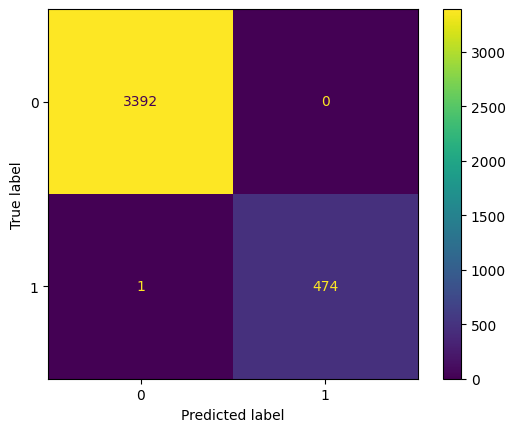

In [258]:
ConfusionMatrixDisplay.from_estimator(SVM, X_trains_t, y_train)
plt.show()

In [259]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the model is:",acc)
print("precision_score is:",precision_score(y_test,y_pred))
print("recall_score is:",recall_score(y_test,y_pred))
print("f1_score is:",f1_score(y_test,y_pred))

[[1119    5]
 [  17  149]]
Accuracy of the model is: 0.9829457364341085
precision_score is: 0.9675324675324676
recall_score is: 0.8975903614457831
f1_score is: 0.9312499999999999


In [260]:
#Classification using support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')
SVM.fit(X_trains_t,y_train)

SVC(gamma='auto', kernel='linear')

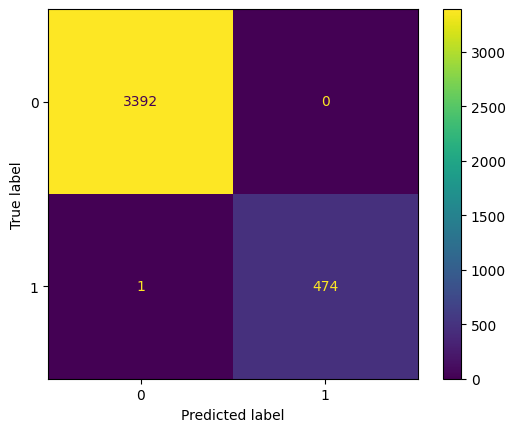

In [261]:
ConfusionMatrixDisplay.from_estimator(SVM, X_trains_t, y_train)
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1124
           1       0.99      0.90      0.94       166

    accuracy                           0.99      1290
   macro avg       0.99      0.95      0.97      1290
weighted avg       0.99      0.99      0.98      1290



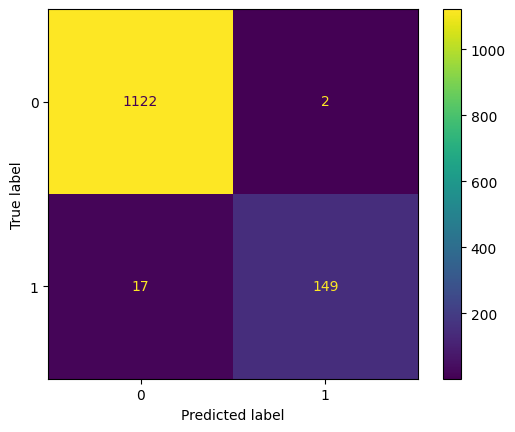

In [262]:
ConfusionMatrixDisplay.from_estimator(SVM, X_test_t, y_test)
print (classification_report(y_test,SVM.predict(X_test_t)))
plt.show()